# K-Means Clustering on Iris Data Set

Being a type of unsupervised machine learning, the K-means cluster algorithm starts with k number of centroids, or means, for the data. Then, iteratively, each data point is classified according to which centroid it is closest to. Next, the centroids are recalculated based on each classified point. This continues until the classifications stop changing for each data point, or a certain number of iterations is reached. Here, we are using the Iris data set to try and separate an unclassified set of points into 3 distinct groups.

In [264]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import math
import statistics as stat

In [162]:
# Change these features however you want, and the rest of the program will run accordingly
# Can be two of any of these four: SepalLength, SepalWidth, PetalLength, PetalWidth
feature1 = 'SepalLength'
feature2 = 'PetalWidth'

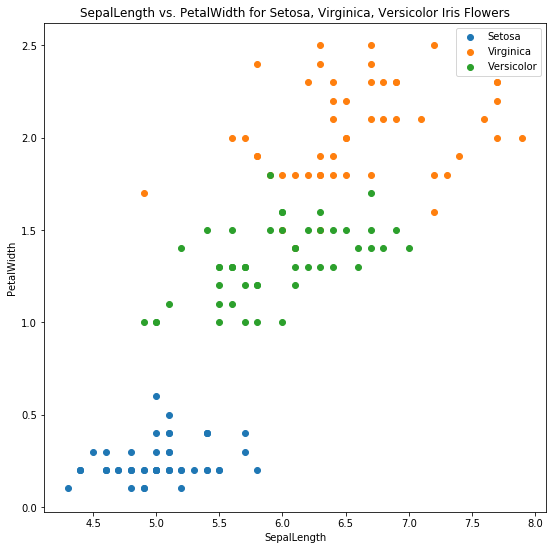

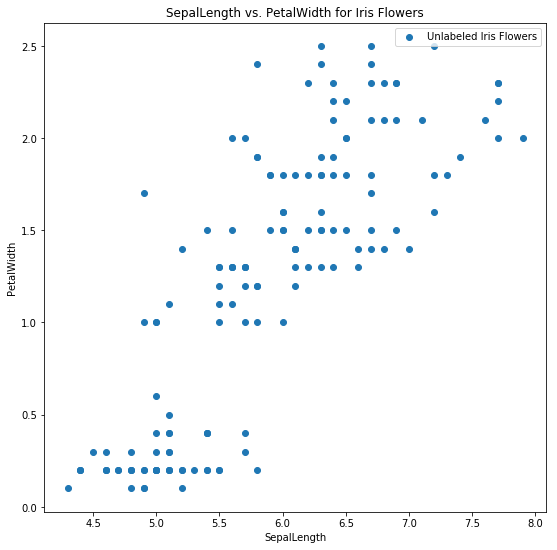

In [163]:
iris = pd.read_csv('iris_data.csv')
data = iris[[feature1, feature2, 'Species']]

x1 = np.array(data[data['Species'] == 'setosa'][feature1])
y1 = np.array(data[data['Species'] == 'setosa'][feature2])
x2 = np.array(data[data['Species'] == 'virginica'][feature1])
y2 = np.array(data[data['Species'] == 'virginica'][feature2])
x3 = np.array(data[data['Species'] == 'versicolor'][feature1])
y3 = np.array(data[data['Species'] == 'versicolor'][feature2])

# Plot of the flowers with labels
plt.figure(figsize=(9,9))
plt.scatter(x1, y1, label="Setosa")
plt.scatter(x2, y2, label="Virginica")
plt.scatter(x3, y3, label="Versicolor")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Iris Flowers')
plt.legend()

# Plot of the flowers without labels
# Basically what the Algorithm will start with
plt.figure(figsize=(9,9))
plt.scatter(np.array(data[feature1]), np.array(data[feature2]), label="Unlabeled Iris Flowers")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs. ' + feature2 + ' for Iris Flowers')
plt.legend()

We see in the first graph how the data should be classified. What we will attempt to do is to give the algorithm unclassified data, as in graph 2, along with 3 random centroids to see how well the algorithm can classify the data.

In [244]:
def distance(array1, array2):
    """
    Calculates the Euclidian distance between two arrays of the same length 
    INPUTS:
        - array1, an array of length n
        - array2, an array of length n
    OUTPUTS:
        - euc_dist, the Euclidean Distance between array1 and array2
    """
    n = len(array1)
    total_sum = 0
    for i in range(n):
        total_sum += (array1[i] - array2[i])**2
    return math.sqrt(total_sum)

def all_distances(array1, train_df):
    """
    Calculates the Euclidean Distance between array1 and every row in train_data
    INPUTS:
        - array1, an array of length n
        - train_df, a Pandas DataFrame of size m x n
    OUTPUTS:
        - distances, a list of length m that consists of all the distances
                    between array1 and every row in train_df, respectively
    """
    n = len(array1)
    m = len(train_df.index)
    distances = []
    for i in range(m):
        a1 = array1
        a2 = np.array(train_df[[feature1, feature2]].loc[i])
        distances.append(distance(a1, a2))
    return distances
        
def KMC(centroid_df, data_df, plot = True, num_iterations = 100):
    """
    Uses K-Means Clustering algorithm to group a set of unclassified data points
    INPUTS:
        - centroid_df, a DataFrame of size k x n, where each row is a centroid.
                        The algorithm will split the data into k clusters.
        - data_df, the Data Frame of size m x n, where each row is a data point
        - plot, if True, at the end of the algorithm, the data points will be plotted
                        as they have been clustered together
        - num_iterations, the max number of iterations to keep the algorithm from 
                        running indefinitely
    OUTPUTS:
        - Plot, if the plot is true, then a plot will be displayed of the clusters
        - A Dataframe containing the final centroids
    """
    k = len(centroid_df)
    m = len(data_df)
    copy_df = data_df
    
    # Plotting the intial centroids
    if plot:
        plt.figure(figsize=(9,9))
        plt.scatter(np.array(centroid_df[feature1]), np.array(centroid_df[feature2]), color='black', 
                    marker='^', s=125, label='Initial Centroids')
    
    # Initial Classification
    classification = []
    for i in range(m):
        distances = all_distances(np.array(copy_df.loc[i]), centroid_df)
        if (distances[0] <= distances[1]) and (distances[0] <= distances[2]):
            classification.append(1)
        elif (distances[1] <= distances[0]) and (distances[1] <= distances[2]):
            classification.append(2)
        elif (distances[2] <= distances[0]) and (distances[2] <= distances[1]):
            classification.append(3)
    copy_df['classification'] = classification    
                
    # Re-classifying each data point and updating the centroids
    no_change = False
    j = 0
    old_centroids = centroid_df
    while (not no_change) and (j <= num_iterations):
        j+=1
        
        # Separating the Data into each separately classified group and
        # Finding the new centroids for each group
        group1 = copy_df[copy_df['classification']==1][[feature1, feature2]]
        group2 = copy_df[copy_df['classification']==2][[feature1, feature2]]
        group3 = copy_df[copy_df['classification']==3][[feature1, feature2]]
        centroid_x = [stat.mean(np.array(group1[feature1])), stat.mean(np.array(group2[feature1])), 
                      stat.mean(np.array(group3[feature1]))]
        centroid_y = [stat.mean(np.array(group1[feature2])), stat.mean(np.array(group2[feature2])), 
                      stat.mean(np.array(group3[feature2]))]
        new_centroids = pd.DataFrame({feature1:centroid_x, feature2:centroid_y})
        
        # if plot = True, this plots all the centroids as they change
        if plot:
            plt.scatter(np.array(new_centroids[feature1]), np.array(new_centroids[feature2]), color='black', marker='+', 
                    zorder=1, s=200)
            plt.plot(np.array([old_centroids[feature1].loc[0], new_centroids[feature1].loc[0]]),
                    np.array([old_centroids[feature2].loc[0], new_centroids[feature2].loc[0]]), color='black', zorder=1)
            plt.plot(np.array([old_centroids[feature1].loc[1], new_centroids[feature1].loc[1]]),
                    np.array([old_centroids[feature2].loc[1], new_centroids[feature2].loc[1]]), color='black', zorder=1)
            plt.plot(np.array([old_centroids[feature1].loc[2], new_centroids[feature1].loc[2]]),
                    np.array([old_centroids[feature2].loc[2], new_centroids[feature2].loc[2]]), color='black', zorder=1)
        
        # Reclassifying all data points using distances from the new centroids
        classification = np.array(classification)
        new_classification = []
        for i in range(m):
            distances = all_distances(np.array(copy_df[[feature1, feature2]].loc[i]), 
                                      new_centroids)
            if distances[0] <= distances[1] and distances[0] <= distances[2]:
                new_classification.append(1)
            elif distances[1] <= distances[0] and distances[1] <= distances[2]:
                new_classification.append(2)
            elif distances[2] <= distances[0] and distances[2] <= distances[1]:
                new_classification.append(3)
                
        if (np.count_nonzero(classification == np.array(new_classification)) == m):
            no_change = True
        else:
            copy_df['classification'] = new_classification
            old_centroids = new_centroids
        
    # If plot = True, then the plot of the data and it's classification by the
    # algorithm is produced
    if plot:
        x1 = np.array(copy_df[copy_df['classification']==1][feature1]) 
        y1 = np.array(copy_df[copy_df['classification']==1][feature2])
        x2 = np.array(copy_df[copy_df['classification']==2][feature1])
        y2 = np.array(copy_df[copy_df['classification']==2][feature2])
        x3 = np.array(copy_df[copy_df['classification']==3][feature1])
        y3 = np.array(copy_df[copy_df['classification']==3][feature2])
        
        plt.scatter(x1, y1, label="1", color='blue', zorder=1)
        plt.scatter(x2, y2, label="2", color='green', zorder=1)
        plt.scatter(x3, y3, label="3", color='purple', zorder=1)
        plt.scatter(np.array(new_centroids[feature1]), np.array(new_centroids[feature2]), color='red', marker='+', 
                    label='Final Centroids', zorder=2, s=200)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(feature1 + ' vs. ' + feature2 + ' for Iris Flowers')
        plt.legend()
    
    return

The below cells will now test the algorithm to see if it works with random centroids, as well as centroids we give initially.

Warning: If running this on your own, you may receive an error that says "mean needs at least one value". Sometimes, the randomly generated centroids are placed too far from the data or too close to each other, resulting in the centroid calculator malfunctioning. Simply continue to re-run the cell until it works.

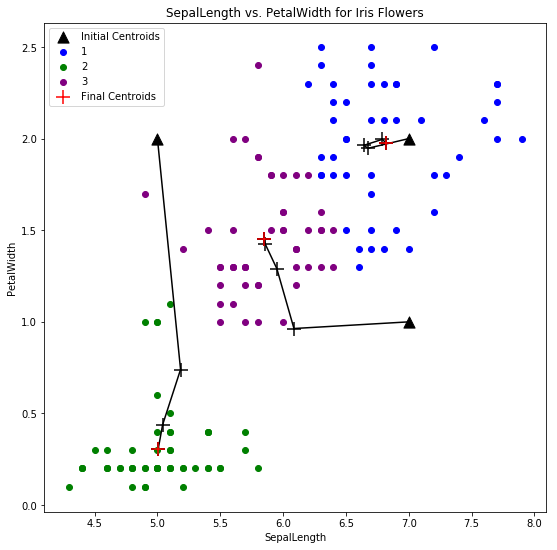

In [270]:
x = []
y = []
for _ in range(3):
    x.append(np.random.randint(5, 8))
    y.append(np.random.randint(0, 3))
centroids = pd.DataFrame({feature1:x, feature2:y})
KMC(centroids, data[[feature1, feature2]], plot=True, num_iterations=25)

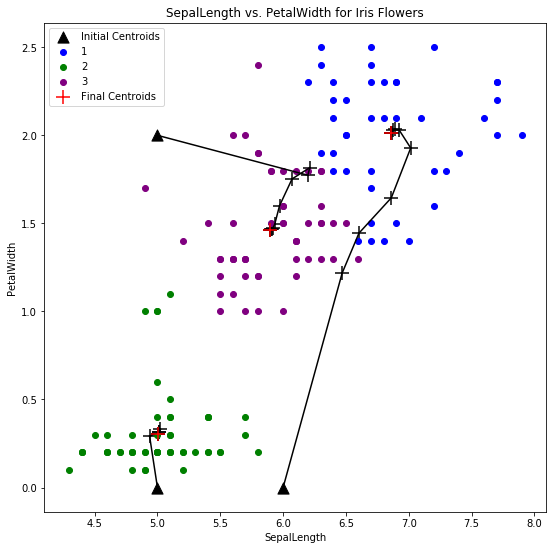

In [252]:
x = []
y = []
for _ in range(3):
    x.append(np.random.randint(5, 8))
    y.append(np.random.randint(0, 3))
centroids = pd.DataFrame({feature1:x, feature2:y})
KMC(centroids, data[[feature1, feature2]], plot=True, num_iterations=25)

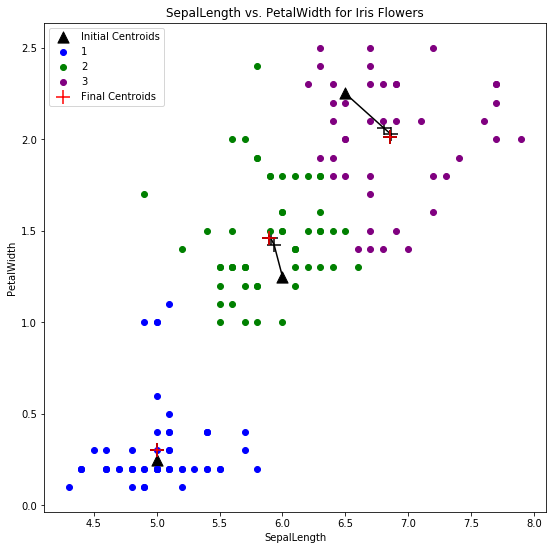

In [254]:
x = [5, 6, 6.5]
y = [0.25, 1.25, 2.25]

centroids = pd.DataFrame({feature1:x, feature2:y})
KMC(centroids, data[[feature1, feature2]], plot=True, num_iterations=25)

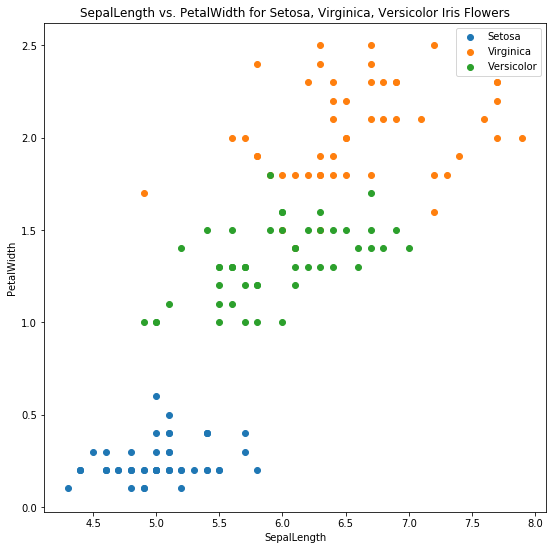

In [271]:
# Plot of the original data with its correct classifications
# Compare with the above plots and the accuracy with which
# K-Means Clustering performs

plt.figure(figsize=(9,9))
plt.scatter(x1, y1, label="Setosa")
plt.scatter(x2, y2, label="Virginica")
plt.scatter(x3, y3, label="Versicolor")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs. ' + feature2 + ' for Setosa, Virginica, Versicolor Iris Flowers')
plt.legend()

## Conclusion:
What we see is that the algorithm actually works extremely well, despite not knowing how the original data should be classified. Also, we can see that even though many of the centroids start in wildy different combinations of positions, all 3 of the tests ended up classifying the data almost exactly the same. The last plot is a re-plotting of the original data to compare accuracy of the algorithm's classification